In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from plotly import express as ex

from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras

In [3]:
data = pd.read_csv("Crop_recommendation.csv")

In [4]:
data.sample(2)

,N,P,K,temperature,humidity,ph,rainfall,label
1286,6,139,199,25.673850,81.621213,6.290998,74.109194,grapes
626,13,57,25,28.300415,86.206816,6.863086,50.473339,mungbean


In [6]:
NUM_CLASSES = data['label'].nunique()
NUM_CLASSES

22

In [27]:
LABELS = data['label'].unique()
LABELS

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [28]:
for i in LABELS:
    size = f"{len(data[data['label'] == i])}"
    print(f"{i}: Total {size} values")

rice: Total 100 values
maize: Total 100 values
chickpea: Total 100 values
kidneybeans: Total 100 values
pigeonpeas: Total 100 values
mothbeans: Total 100 values
mungbean: Total 100 values
blackgram: Total 100 values
lentil: Total 100 values
pomegranate: Total 100 values
banana: Total 100 values
mango: Total 100 values
grapes: Total 100 values
watermelon: Total 100 values
muskmelon: Total 100 values
apple: Total 100 values
orange: Total 100 values
papaya: Total 100 values
coconut: Total 100 values
cotton: Total 100 values
jute: Total 100 values
coffee: Total 100 values


In [21]:
data.shape

(2200, 8)

Text(0, 0.5, 'Total Count')

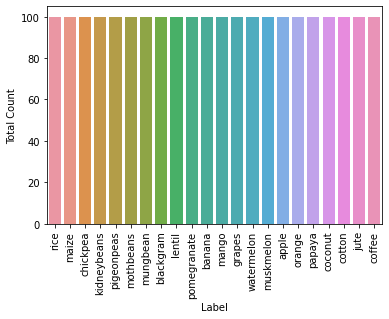

In [23]:
sns.countplot(data=data,x="label")
plt.xticks(rotation="90")
plt.xlabel("Label")
plt.ylabel("Total Count")

In [25]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [48]:
def visualize_data(cond):
    plt.figure(figsize=(15,25))
    for idx,col in enumerate(LABELS,start=1):
        plt.subplot(11,2,idx)
        temp_col = data[data['label'] == col] 
        sns.histplot(data=temp_col,x=cond)
        plt.title(col)

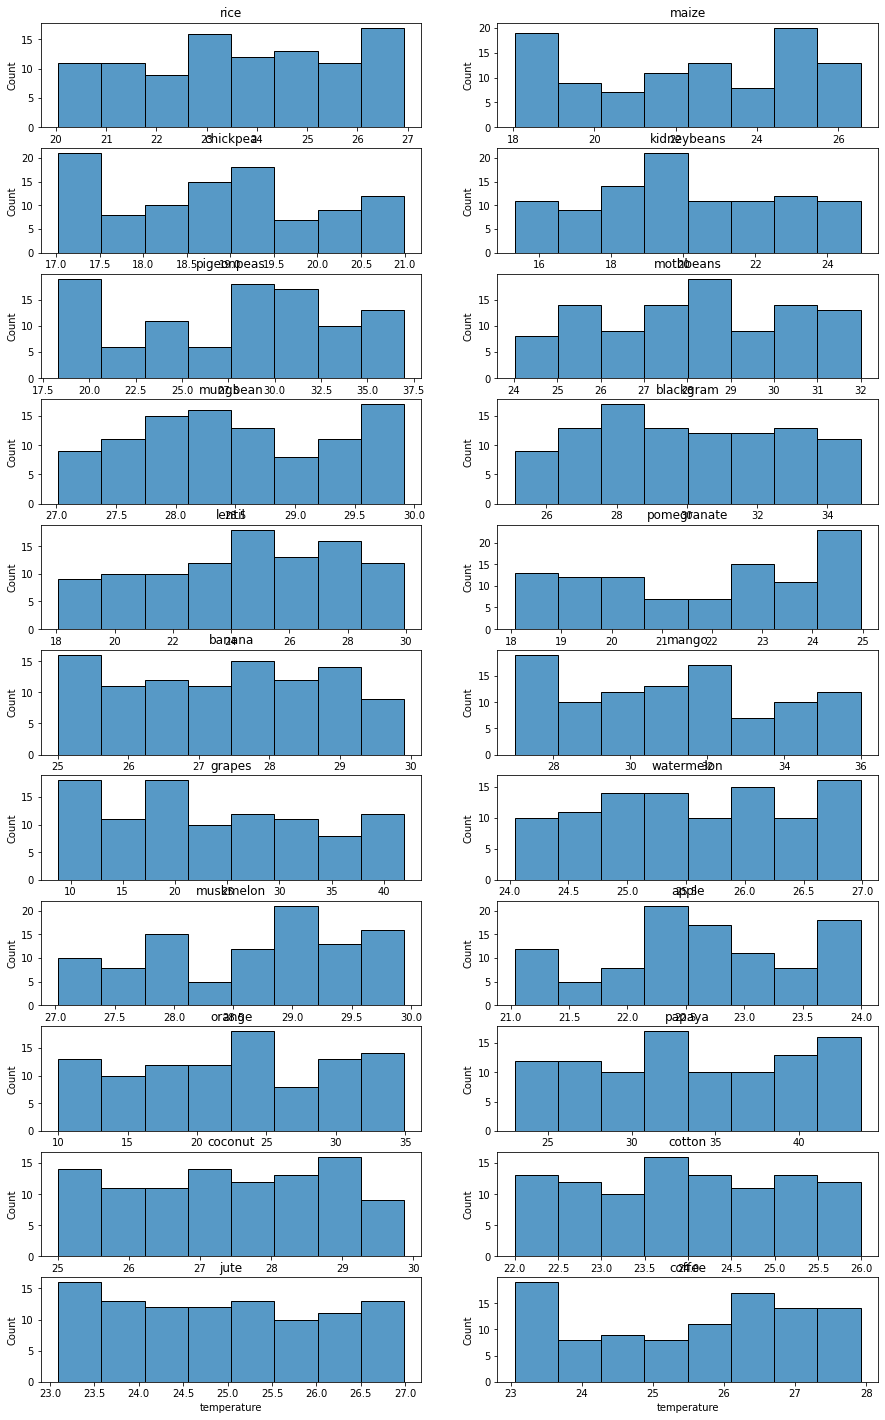

In [49]:
visualize_data("temperature")

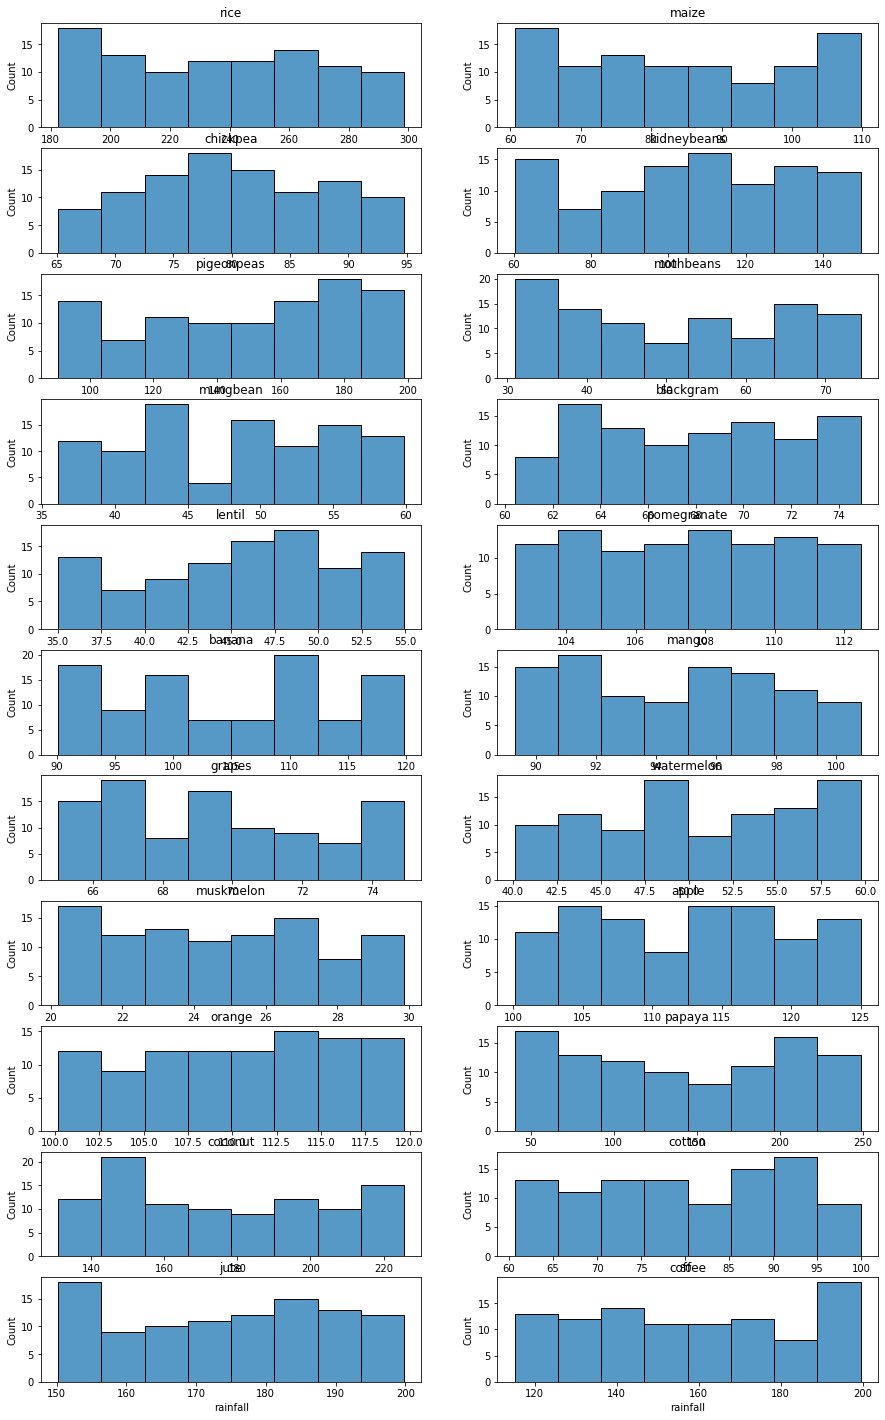

In [51]:
visualize_data("rainfall")

In [52]:
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [154]:
X = data[['temperature','humidity','ph','rainfall']]
y = np.array(data['label'])

In [155]:
mms = MinMaxScaler()
X = mms.fit_transform(X)

In [156]:
le = LabelEncoder()
y = le.fit_transform(y)

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [158]:
X_train.shape,y_train.shape

((1650, 4), (1650,))

In [168]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(128,input_shape=(4,)))
model.add(keras.layers.Dense(256,activation="relu",kernel_regularizer="l2"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(512,activation="leaky_relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(1024,activation="relu",kernel_regularizer="l2"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(NUM_CLASSES,activation="softmax"))

In [169]:
model.compile(
    optimizer='rmsprop',
    loss="sparse_categorical_crossentropy",
    metrics=['acc']
)

In [170]:
history = model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
52/52 [==============================] - 2s 11ms/step - loss: 9.5797 - acc: 0.4630 - val_loss: 10.1669 - val_acc: 0.0418
Epoch 2/100
52/52 [==============================] - 0s 9ms/step - loss: 7.5041 - acc: 0.6152 - val_loss: 9.5599 - val_acc: 0.0418
Epoch 3/100
52/52 [==============================] - 0s 9ms/step - loss: 6.1512 - acc: 0.6315 - val_loss: 9.0700 - val_acc: 0.0564
Epoch 4/100
52/52 [==============================] - 0s 9ms/step - loss: 5.0177 - acc: 0.6594 - val_loss: 8.0549 - val_acc: 0.0636
Epoch 5/100
52/52 [==============================] - 0s 9ms/step - loss: 4.0448 - acc: 0.6848 - val_loss: 7.0200 - val_acc: 0.1600
Epoch 6/100
52/52 [==============================] - 0s 9ms/step - loss: 3.4646 - acc: 0.6855 - val_loss: 6.3306 - val_acc: 0.1255
Epoch 7/100
52/52 [==============================] - 1s 10ms/step - loss: 3.0462 - acc: 0.6727 - val_loss: 5.4083 - val_acc: 0.2818
Epoch 8/100
52/52 [==============================] - 0s 9ms/step - loss: 2.6041 

Epoch 63/100
52/52 [==============================] - 1s 10ms/step - loss: 1.1024 - acc: 0.7933 - val_loss: 0.8654 - val_acc: 0.8455
Epoch 64/100
52/52 [==============================] - 0s 10ms/step - loss: 1.1027 - acc: 0.7739 - val_loss: 1.2356 - val_acc: 0.7036
Epoch 65/100
52/52 [==============================] - 0s 10ms/step - loss: 1.0949 - acc: 0.7764 - val_loss: 1.1883 - val_acc: 0.7491
Epoch 66/100
52/52 [==============================] - 1s 10ms/step - loss: 1.0555 - acc: 0.7758 - val_loss: 1.2909 - val_acc: 0.7109
Epoch 67/100
52/52 [==============================] - 0s 10ms/step - loss: 1.1090 - acc: 0.7764 - val_loss: 1.0108 - val_acc: 0.8036
Epoch 68/100
52/52 [==============================] - 1s 10ms/step - loss: 1.0906 - acc: 0.7800 - val_loss: 1.1353 - val_acc: 0.7473
Epoch 69/100
52/52 [==============================] - 0s 9ms/step - loss: 1.0840 - acc: 0.7630 - val_loss: 1.1648 - val_acc: 0.7709
Epoch 70/100
52/52 [==============================] - 1s 10ms/step - l

In [171]:
results = pd.DataFrame(history.history)

In [172]:
results

,loss,acc,val_loss,val_acc
0,9.579748,0.463030,10.166887,0.041818
1,7.504075,0.615152,9.559928,0.041818
2,6.151176,0.631515,9.069983,0.056364
3,5.017728,0.659394,8.054938,0.063636
4,4.044760,0.684848,7.020039,0.160000
...,...,...,...,...
95,0.987841,0.787273,0.813270,0.845455
96,1.060395,0.776970,0.949469,0.827273
97,0.999075,0.787273,1.735402,0.712727
98,1.031424,0.793939,0.942459,0.825455


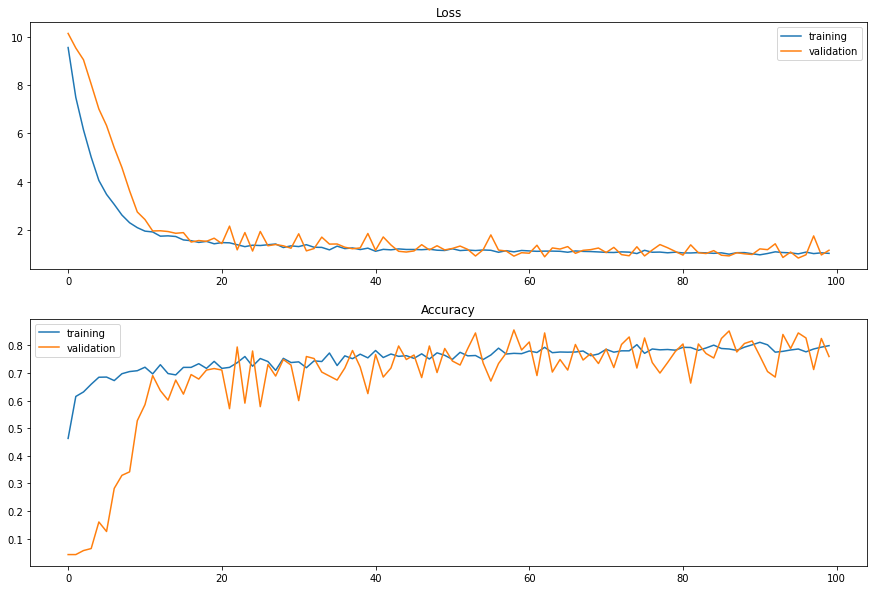

In [173]:
plt.figure(figsize=(15,10))

epoch = history.epoch

plt.subplot(2,1,1)
plt.plot(epoch,results['loss'],label="training")
plt.plot(epoch,results['val_loss'],label="validation")
plt.title("Loss")
plt.legend()

plt.subplot(2,1,2)
plt.plot(epoch,results['acc'],label="training")
plt.plot(epoch,results['val_acc'],label="validation")
plt.title("Accuracy")
plt.legend()

In [174]:
model.save("Fertilization.h5")